# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()


## Load the data

In [3]:
df = pd.read_csv('real_estate_price_size.csv', sep = ',')
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [6]:
x = df['size']
y = df['price']


### Explore the data

In [7]:
x.shape

(100,)

In [8]:
y.shape

(100,)

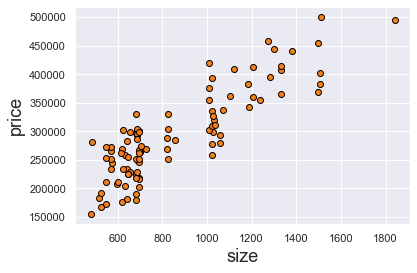

In [27]:
plt.scatter(x,y, edgecolors='#000000', c='tab:orange')
plt.xlabel('size', fontsize= 18)
plt.ylabel('price', fontsize=18)
plt.show()

### Transform the inputs into a matrix (2D object)

In [11]:
x_matrix = x.values.reshape(-1,1)

### Regression itself

In [12]:
reg = LinearRegression()

In [13]:
reg.fit(x_matrix,y)

LinearRegression()

### Calculate the R-squared

In [14]:
reg.score(x_matrix,y)

0.7447391865847587

### Find the intercept

In [15]:
reg.intercept_

101912.60180122912

### Find the coefficients

In [16]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [17]:
reg.predict([[750]])

array([269296.65874718])

### Compare to statsmodels method

In [29]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           8.13e-31
Time:                        17:54:02   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""